In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from model.parse_params import parse_params
from model.input_fn import dataset_pipeline

# random brightness from scratch

tf.Tensor(0.6591852, shape=(), dtype=float32)


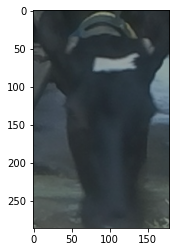

In [78]:
with tf.device(f'/device:GPU:2'):
    image_string = tf.io.read_file('/home/ubuntu/dataset/CowFace19/test/00/02_0419012.jpg')
    image = tf.image.decode_jpeg(image_string, channels=3, dct_method='INTEGER_ACCURATE')
    image = tf.cast(image, tf.float32)
    delta = tf.random.uniform([], 0.3, 1.0)
    image = image * delta
    print(delta)
    plt.imshow(image.numpy().astype("uint8"))

# test random distribute

(array([102.,  88.,  98.,  91., 107., 107., 104.,  97.,  98., 108.]),
 array([0.30016005, 0.37013966, 0.44011924, 0.5100988 , 0.5800784 ,
        0.65005803, 0.72003764, 0.79001725, 0.8599968 , 0.9299764 ,
        0.999956  ], dtype=float32),
 <a list of 10 Patch objects>)

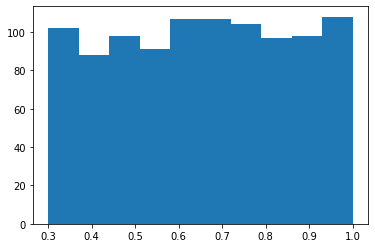

In [7]:
arr = []
with tf.device(f'/device:GPU:2'):
    for i in range(1000):
        arr.append(tf.random.uniform([], 0.3, 1.0).numpy())
fig, ax = plt.subplots()
ax.hist(arr)

# shuffle -> batch -> repeat

In [13]:
with tf.device(f'/device:GPU:2'):
    raw = tf.range(12)
    dataset = (
        tf.data.Dataset.from_tensor_slices(raw)
        .batch(3)
    )
    for i, datas in enumerate(dataset):
        print(datas.numpy())
    print("")
    dataset = (
        tf.data.Dataset.from_tensor_slices(raw)
        .shuffle(12)
        .batch(3)
    )
    for i, datas in enumerate(dataset):
        print(datas.numpy())
    print("")
    dataset = (
        tf.data.Dataset.from_tensor_slices(raw)
        .shuffle(12)
        .batch(3)
        .repeat(2)
    )
    for i, datas in enumerate(dataset):
        print(datas.numpy())

[0 1 2]
[3 4 5]
[6 7 8]
[ 9 10 11]

[3 4 2]
[8 7 9]
[ 5 11  6]
[10  0  1]

[4 6 3]
[ 0 10  5]
[2 7 8]
[ 9 11  1]
[5 7 9]
[0 8 6]
[10  2  3]
[11  1  4]


# normalize input (-1, 1)

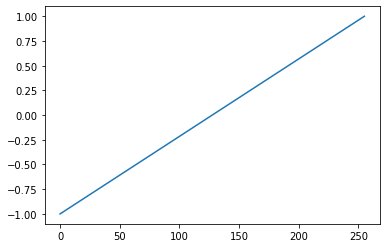

In [11]:
a = np.array([i for i in range(256)])
fig, ax = plt.subplots()
ax.plot(((a/255)-0.5)*2.0)